In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_4_personal.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               898 non-null    int64  
 1   dokoncil_semestr         898 non-null    float64
 2   BI-PA1_znamka            898 non-null    float64
 3   BI-PA1_poradi_zapisu     898 non-null    float64
 4   BI-PA1_semestr           898 non-null    float64
 5   BI-PAI_znamka            898 non-null    float64
 6   BI-PAI_poradi_zapisu     898 non-null    float64
 7   BI-PAI_semestr           898 non-null    float64
 8   BI-CAO_znamka            898 non-null    float64
 9   BI-CAO_poradi_zapisu     898 non-null    float64
 10  BI-CAO_semestr           898 non-null    float64
 11  BI-PS1_znamka            898 non-null    float64
 12  BI-PS1_poradi_zapisu     898 non-null    float64
 13  BI-PS1_semestr           898 non-null    float64
 14  BI-MLO_znamka            8

In [4]:
matrix_bak.mean()

studium_id                 1.368490e+07
dokoncil_semestr           8.162584e-01
BI-PA1_znamka              2.048998e+00
BI-PA1_poradi_zapisu       1.031180e+00
BI-PA1_semestr             9.543430e-01
BI-PAI_znamka              2.144766e+00
BI-PAI_poradi_zapisu       9.443207e-01
BI-PAI_semestr             9.409800e-01
BI-CAO_znamka              1.060690e+00
BI-CAO_poradi_zapisu       9.175947e-01
BI-CAO_semestr             9.175947e-01
BI-PS1_znamka              2.167595e+00
BI-PS1_poradi_zapisu       1.067929e+00
BI-PS1_semestr             9.621381e-01
BI-MLO_znamka              1.851336e+00
BI-MLO_poradi_zapisu       9.877506e-01
BI-MLO_semestr             9.365256e-01
BI-ZMA_znamka              1.979955e+00
BI-ZMA_poradi_zapisu       1.037862e+00
BI-ZMA_semestr             9.510022e-01
pocet_kreditu_semestr_1    2.766592e+01
BI-PA2_znamka              2.487194e+00
BI-PA2_semestr             9.465479e-01
BI-PA2_poradi_zapisu       9.465479e-01
BI-DBS_znamka              1.720490e+00


## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení target proměnné na nominální

In [6]:
dokoncil_semestr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak['dokoncil_semestr'] = matrix_bak['dokoncil_semestr'].astype(dokoncil_semestr_category)

In [7]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 12948006 to 17328906
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         898 non-null    category
 1   BI-PA1_znamka            898 non-null    float64 
 2   BI-PA1_poradi_zapisu     898 non-null    float64 
 3   BI-PA1_semestr           898 non-null    float64 
 4   BI-PAI_znamka            898 non-null    float64 
 5   BI-PAI_poradi_zapisu     898 non-null    float64 
 6   BI-PAI_semestr           898 non-null    float64 
 7   BI-CAO_znamka            898 non-null    float64 
 8   BI-CAO_poradi_zapisu     898 non-null    float64 
 9   BI-CAO_semestr           898 non-null    float64 
 10  BI-PS1_znamka            898 non-null    float64 
 11  BI-PS1_poradi_zapisu     898 non-null    float64 
 12  BI-PS1_semestr           898 non-null    float64 
 13  BI-MLO_znamka            898 non-null    float64 
 14

### Nastavení atributů na kategorické

In [8]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
# pohlavi_kod
matrix_bak['pohlavi_kod'] = matrix_bak['pohlavi_kod'].astype(attr_category)
# je_cech
matrix_bak['je_cech'] = matrix_bak['je_cech'].astype(attr_category)
# gymnazium
matrix_bak['gymnazium'] = matrix_bak['gymnazium'].astype(attr_category)
# praha
matrix_bak['praha'] = matrix_bak['praha'].astype(attr_category)
# scio
matrix_bak['scio'] = matrix_bak['scio'].astype(attr_category)
# olym
matrix_bak['olym'] = matrix_bak['olym'].astype(attr_category)
# zkouska
matrix_bak['zkouska'] = matrix_bak['zkouska'].astype(attr_category)
# prominuti
matrix_bak['prominuti'] = matrix_bak['prominuti'].astype(attr_category)

In [9]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 12948006 to 17328906
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         898 non-null    category
 1   BI-PA1_znamka            898 non-null    float64 
 2   BI-PA1_poradi_zapisu     898 non-null    float64 
 3   BI-PA1_semestr           898 non-null    float64 
 4   BI-PAI_znamka            898 non-null    float64 
 5   BI-PAI_poradi_zapisu     898 non-null    float64 
 6   BI-PAI_semestr           898 non-null    float64 
 7   BI-CAO_znamka            898 non-null    float64 
 8   BI-CAO_poradi_zapisu     898 non-null    float64 
 9   BI-CAO_semestr           898 non-null    float64 
 10  BI-PS1_znamka            898 non-null    float64 
 11  BI-PS1_poradi_zapisu     898 non-null    float64 
 12  BI-PS1_semestr           898 non-null    float64 
 13  BI-MLO_znamka            898 non-null    float64 
 14

## Doplnění NaN hodnot

In [10]:
matrix_bak = matrix_bak.fillna(0)

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [11]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(898, 53)

(898,)

trénovací data


(718, 53)

(718,)

testovací data


(180, 53)

(180,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [13]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [14]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [15]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

0.945147 (+/-0.034502) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.940618 (+/-0.024385) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.933896 (+/-0.018760) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.932697 (+/-0.014437) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.930369 (+/-0.014254) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.943435 (+/-0.028344) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.938994 (+/-0.036609) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.938912 (+/-0.040085) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.935556 (+/-0.034041) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.929147 (+/-0.033992) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [16]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.912256
accuracy score (test): 0.877778


In [17]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
41,pocet_kreditu_semestr_3,1.0
0,BI-PA1_znamka,0.0
39,BI-AG1_semestr,0.0
29,BI-LIN_semestr,0.0
30,BI-LIN_poradi_zapisu,0.0
31,pocet_kreditu_semestr_2,0.0
32,BI-AAG_znamka,0.0
33,BI-AAG_semestr,0.0
34,BI-AAG_poradi_zapisu,0.0
35,BI-ZDM_znamka,0.0


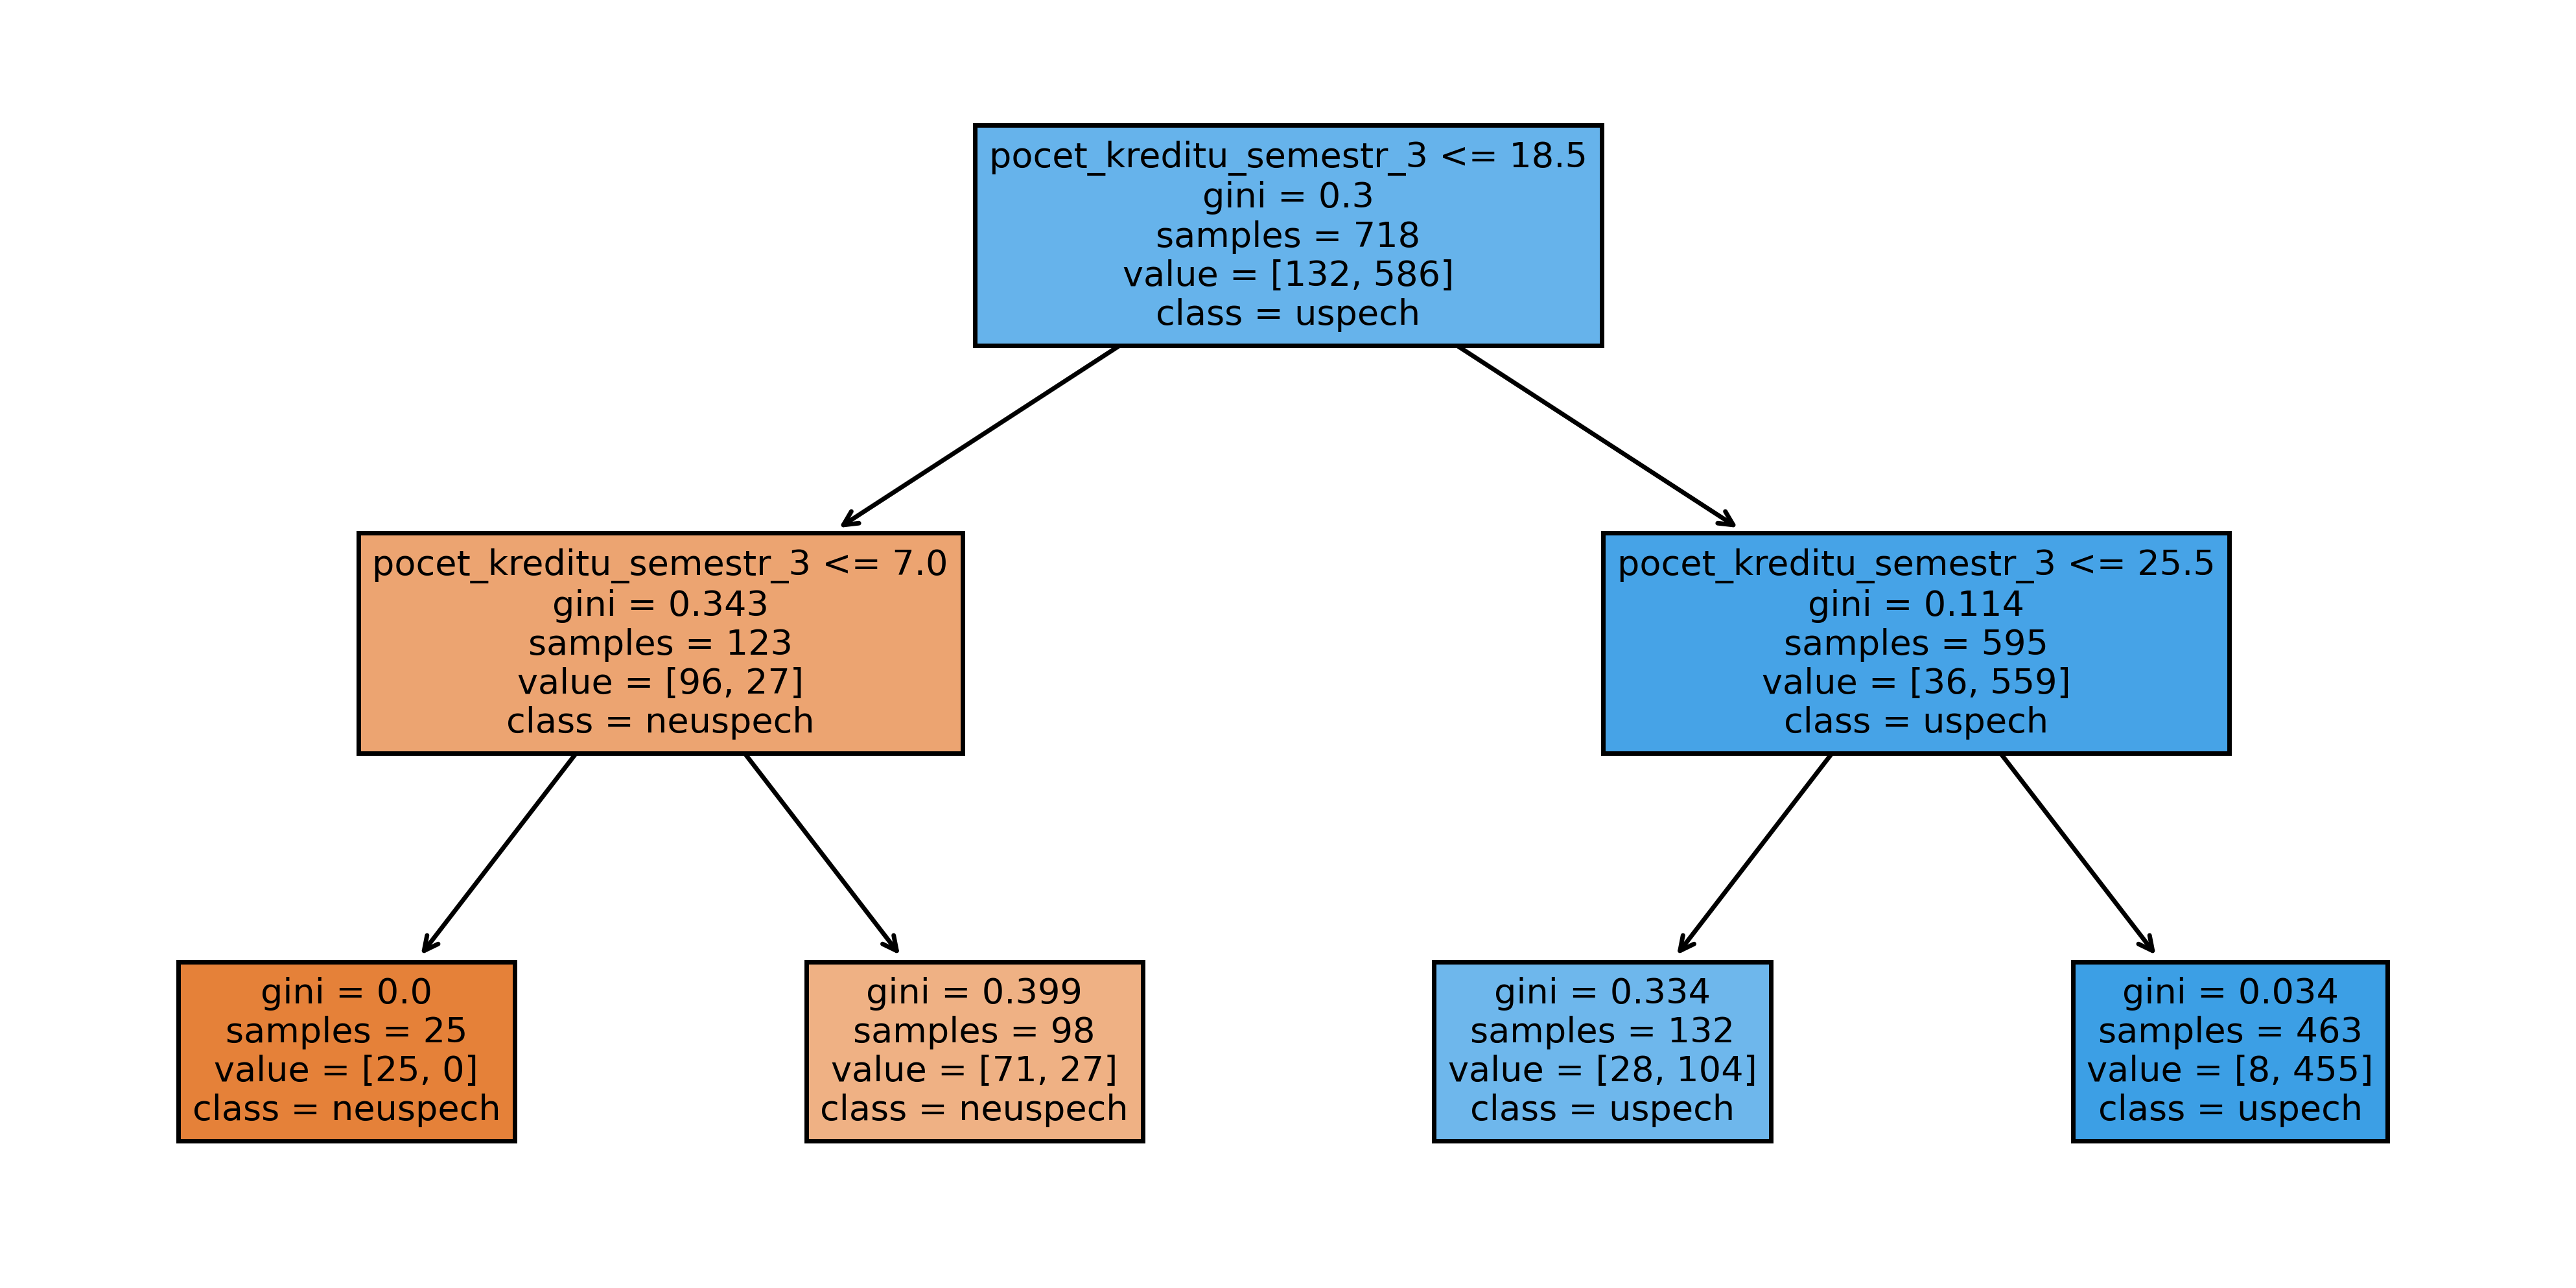

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1_semestr1.png')

#### Random forest

In [19]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [20]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 30}

0.925208 (+/-0.026921) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.921897 (+/-0.032063) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.914273 (+/-0.012565) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.915345 (+/-0.025990) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.924072 (+/-0.012603) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.920944 (+/-0.022640) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.910425 (+/-0.027867) for {'criterion': 'gini', 'max_depth': 2, 'm

In [21]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.913649
accuracy score (test): 0.877778


In [22]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
41,pocet_kreditu_semestr_3,0.863207
44,datum_zahajeni,0.029449
38,BI-AG1_znamka,0.009327
36,BI-ZDM_semestr,0.007438
25,BI-SAP_znamka,0.007290
22,BI-DBS_znamka,0.006997
40,BI-AG1_poradi_zapisu,0.006215
37,BI-ZDM_poradi_zapisu,0.005927
31,pocet_kreditu_semestr_2,0.005559
39,BI-AG1_semestr,0.005118


#### Adaboost

In [23]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [24]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.1, 'n_estimators': 35}

0.946741 (+/-0.032650) for {'learning_rate': 0.1, 'n_estimators': 5}
0.945147 (+/-0.034502) for {'learning_rate': 0.1, 'n_estimators': 10}
0.945147 (+/-0.034502) for {'learning_rate': 0.1, 'n_estimators': 15}
0.945990 (+/-0.038188) for {'learning_rate': 0.1, 'n_estimators': 20}
0.946864 (+/-0.037214) for {'learning_rate': 0.1, 'n_estimators': 25}
0.946807 (+/-0.037076) for {'learning_rate': 0.1, 'n_estimators': 30}
0.947714 (+/-0.037301) for {'learning_rate': 0.1, 'n_estimators': 35}
0.946849 (+/-0.036055) for {'learning_rate': 0.1, 'n_estimators': 40}
0.944439 (+/-0.034431) for {'learning_rate': 0.1, 'n_estimators': 45}
0.945147 (+/-0.034502) for {'learning_rate': 0.2, 'n_estimators': 5}
0.945943 (+/-0.035484) for {'learning_rate': 0.2, 'n_estimators': 10}
0.946783 (+/-0.037161) for {'learning_rate': 0.2, 'n_estimators': 15}
0.944339 (+/-0.034430) for {'learning_rate': 0.2, 'n_estimators': 20}
0.942656 (+/-0.03146

In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.916435
accuracy score (test): 0.866667


In [26]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
41,pocet_kreditu_semestr_3,0.628571
44,datum_zahajeni,0.085714
24,BI-DBS_poradi_zapisu,0.057143
22,BI-DBS_znamka,0.057143
38,BI-AG1_znamka,0.057143
31,pocet_kreditu_semestr_2,0.028571
18,pocet_kreditu_semestr_1,0.028571
40,BI-AG1_poradi_zapisu,0.028571
36,BI-ZDM_semestr,0.028571
0,BI-PA1_znamka,0.000000


#### Xgboost

In [27]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [28]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.9, 'max_depth': 4}

0.940223 (+/-0.045374) for {'eta': 0.1, 'max_depth': 3}
0.943059 (+/-0.022032) for {'eta': 0.1, 'max_depth': 4}
0.939143 (+/-0.036348) for {'eta': 0.1, 'max_depth': 5}
0.939384 (+/-0.035337) for {'eta': 0.1, 'max_depth': 6}
0.939381 (+/-0.031266) for {'eta': 0.1, 'max_depth': 7}
0.936806 (+/-0.029383) for {'eta': 0.2, 'max_depth': 3}
0.941085 (+/-0.029745) for {'eta': 0.2, 'max_depth': 4}
0.937874 (+/-0.034947) for {'eta': 0.2, 'max_depth': 5}
0.938544 (+/-0.040780) for {'eta': 0.2, 'max_depth': 6}
0.940584 (+/-0.032581) for {'eta': 0.2, 'max_depth': 7}
0.942892 (+/-0.026217) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.943144 (+/-0.031373) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.942838 (+/-0.035668) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.941159 (+/-0.026149) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.938550 (+/-0.024587) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.938014 (+/-0.022387)

In [29]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 1.000000
accuracy score XGBoost (val): 0.866667


In [30]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [31]:
feat_imp

pocet_kreditu_semestr_3    52.0
pocet_kreditu_semestr_2    39.0
BI-PS1_znamka              26.0
BI-PA2_znamka              26.0
pocet_kreditu_semestr_1    25.0
BI-ZDM_znamka              25.0
BI-ZMA_znamka              24.0
datum_zahajeni             23.0
BI-LIN_znamka              23.0
BI-PA1_znamka              21.0
BI-DBS_znamka              21.0
BI-AAG_znamka              20.0
BI-SAP_znamka              19.0
gymnazium                  19.0
je_cech                    19.0
rok_maturity               17.0
BI-PAI_znamka              15.0
BI-MLO_znamka              14.0
maturita_nastup_rozdil     12.0
praha                      10.0
BI-AG1_znamka               9.0
BI-CAO_znamka               4.0
BI-PA1_poradi_zapisu        3.0
BI-MLO_poradi_zapisu        1.0
dtype: float64

#### MLP

In [32]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [33]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.885794
accuracy score mlp (val): 0.850000


#### Lineární regrese

In [34]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [35]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.25522181829037993
RMSE reg (test): 0.29514593067224293


#### kNN

In [36]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [37]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}

0.909372 (+/-0.017083) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.909372 (+/-0.017083) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.909312 (+/-0.030484) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.909312 (+/-0.030484) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.909522 (+/-0.033811) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.907193 (+/-0.014297) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.910178 (+/-0.030783) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.909121 (+/-0.035476) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.935137 (+/-0.032787) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.935137 (+/-0.032787) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.936016 (+/-0.026454) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.936016 (+/-0.026454) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9

In [38]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 1.000000
accuracy score knn (val): 0.861111


## Výsledky

In [39]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [40]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

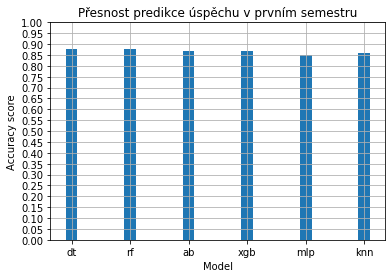

In [41]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [42]:
results

,vysledky
dt,0.878
rf,0.878
ab,0.867
xgb,0.867
mlp,0.85
knn,0.861


### Měřeno f1_score

In [43]:
results_f1 = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

In [44]:
results_f1.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results_f1.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results_f1.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results_f1.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results_f1.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results_f1.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

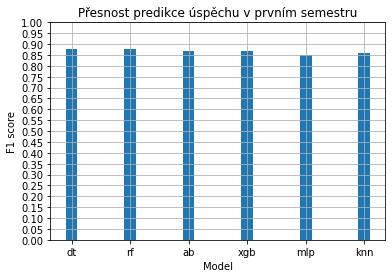

In [45]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results_f1.index, results_f1['vysledky'].values, width)

ax.set_ylabel('F1 score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [46]:
results_f1

,vysledky
dt,0.878
rf,0.878
ab,0.867
xgb,0.867
mlp,0.85
knn,0.861
